In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from scipy.ndimage.measurements import label
import glob
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from util_functions import *
import time
from sklearn.svm import LinearSVC
from sklearn.externals import joblib

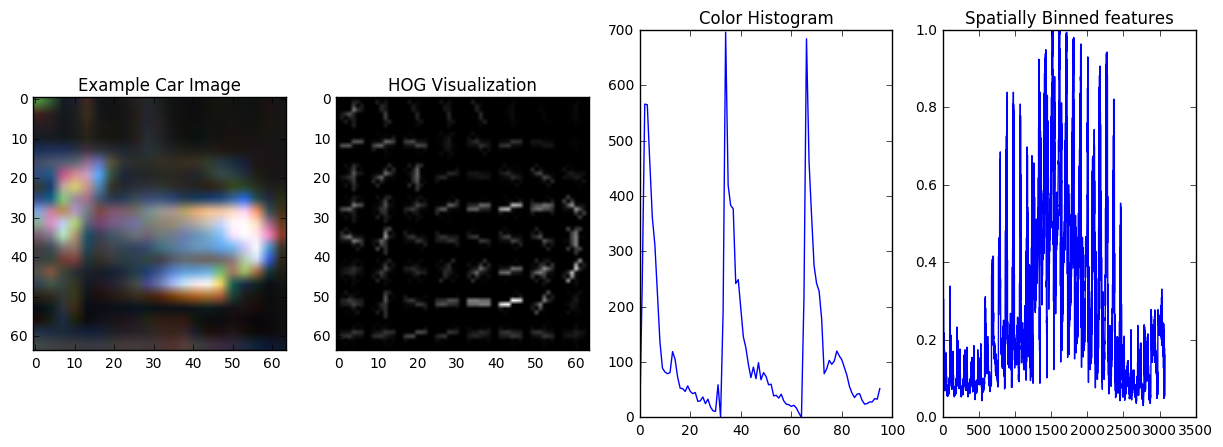

In [3]:
# Read in our vehicles
images = glob.glob('./vehicle_test/*.png')
cars = []

for image in images:
    cars.append(image)
        
# Generate a random index to look at a car image
ind = 1 #np.random.randint(0, len(cars))
# ind=0
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


bin_spat = bin_spatial(image, size=(32, 32))
chist = color_hist(image, nbins=32, bins_range=(0.0, 1.0))

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
_, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(142)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.subplot(143)
plt.plot(chist)
plt.title('Color Histogram')
plt.subplot(144)
plt.plot(bin_spat)
plt.title('Spatially Binned features')


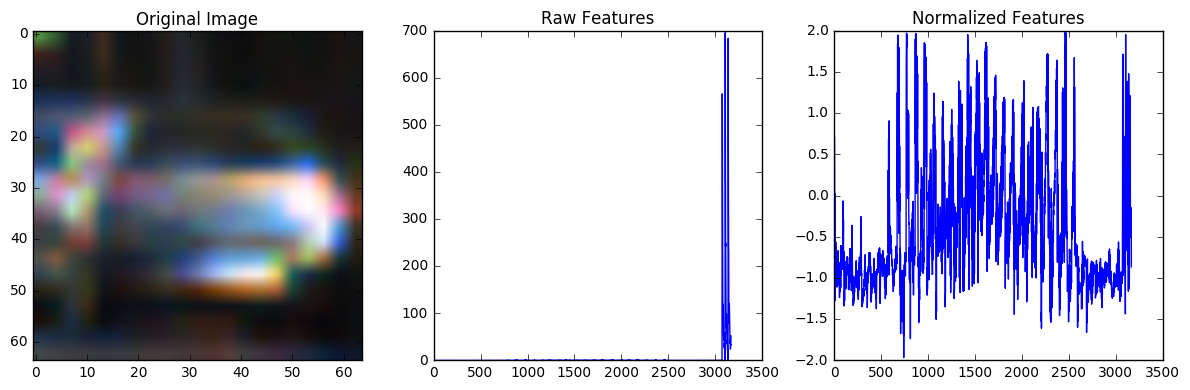

In [4]:
# Read in our vehicles and non-vehicles
images = glob.glob('./vehicle_test/*.png')
cars = []

for image in images:
    cars.append(image)
        
# car_features = extract_hb_features(cars, cspace='RGB', spatial_size=(32, 32),
#                         hist_bins=32, hist_range=(0, 256))

car_features = extract_hb_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0.0, 1.0))


if len(car_features) > 0:
    # Create an array stack of feature vectors
#     X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    X = car_features                       
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = 1# np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

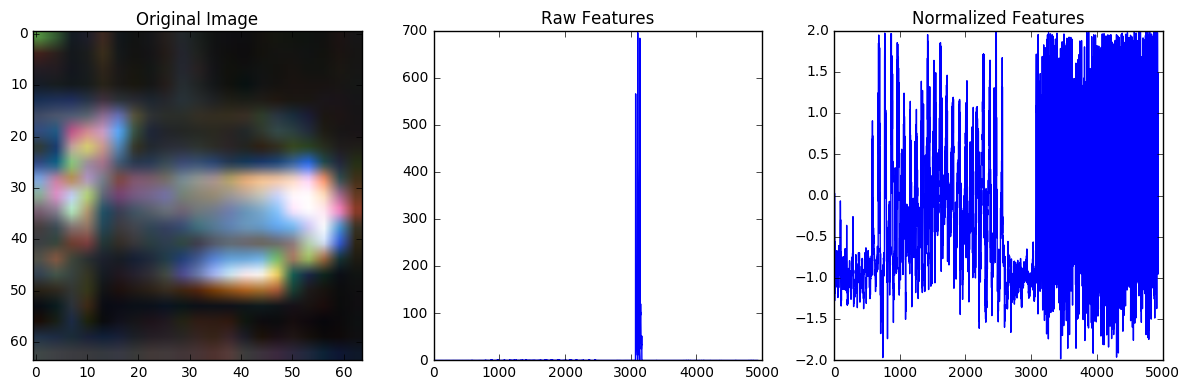

In [5]:
from util_functions import *

# Read in our vehicles and non-vehicles
images = glob.glob('./vehicle_test/*.png')
cars = []

for image in images:
    cars.append(image)
        
car_features = extract_features(cars, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32,
                        spatial_feat=True, hist_feat=True, hog_feat=True)

if len(car_features) > 0:
    # Create an array stack of feature vectors
#     X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    X = car_features                       
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = 1 #np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

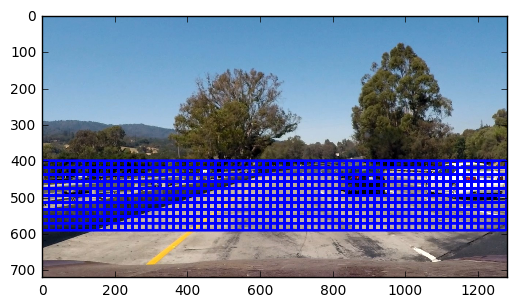

In [6]:
image = mpimg.imread('./test_images/test1.jpg')

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 600], 
                    xy_window=(96, 96), xy_overlap=(0.8, 0.8))
# for w in windows:
#     print(w)
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

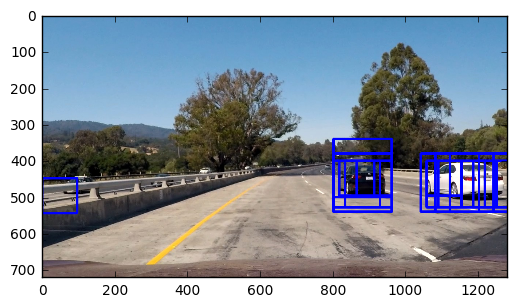

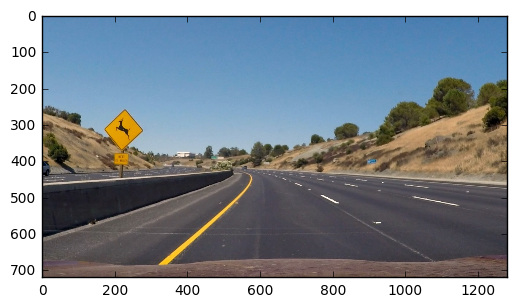

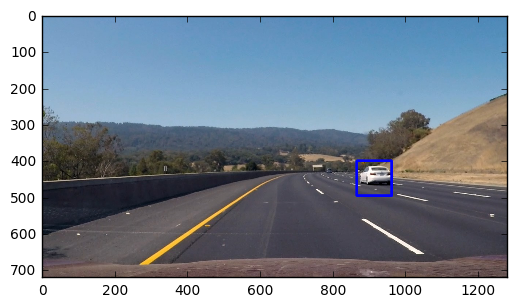

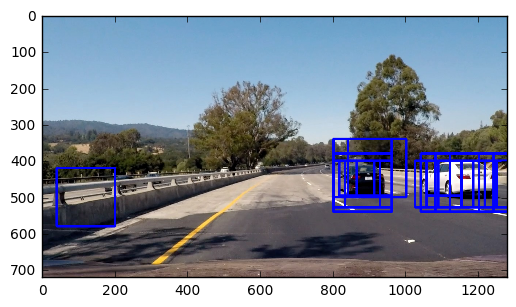

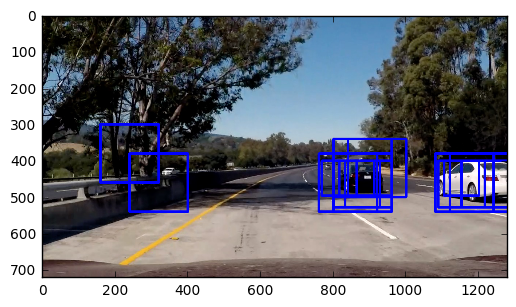

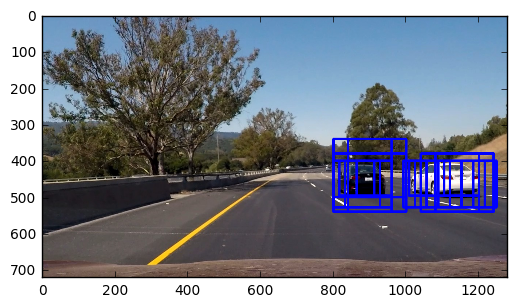

In [7]:
   
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 12  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 600] # Min and max in y to search in slide_window()


# Fit a per-column scaler
X_scaler = joblib.load('./scaler_YCrCb_HOG-ALL_featlen_10224.pkl') 

# Use a linear SVC 
svc = joblib.load('./svc_YCrCb_HOG-ALL_featlen_10224.pkl') 

images = glob.glob('./test_images/*.jpg')

for img_file in images:

    image = mpimg.imread(img_file)
    draw_image = np.copy(image)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255

    windows_1 = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,600], 
                        xy_window=(96, 96), xy_overlap=(0.5, 0.5))
    windows_2 = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,700], 
                        xy_window=(128, 128), xy_overlap=(0.75, 0.75))
    windows_3 = slide_window(image, x_start_stop=[None, None], y_start_stop=[300,700], 
                        xy_window=(160, 160), xy_overlap=(0.75, 0.75))
    
    windows = windows_1 + windows_2 + windows_3

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    plt.imshow(window_img)
    plt.show()

In [8]:
# %load_ext autoreload

# %autoreload 2

# import util_functions

class VehicleDetection:

    heatmaps = []
    color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 12  # HOG orientations
    pix_per_cell = 8 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32    # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off
    y_start_stop = [400, 600] # Min and max in y to search in slide_window()

    X_scaler = joblib.load('./scaler_2_YCrCb_HOG-ALL_featlen_10224.pkl') 

    svc = joblib.load('./svc_2_YCrCb_HOG-ALL_featlen_10224.pkl') 
    
    scale = 1.5
    
    n_heatmaps = 1
    heat_threshold = 1
    
    def __init__(self, n_heatmaps=1, heat_threshold=1):
        self.heatmaps = []
        self.n_heatmaps=n_heatmaps
        self.heat_threshold = heat_threshold
        
    def add_heatmap(self, heatmap):
        self.heatmaps.append(heatmap)
        if len(self.heatmaps)>self.n_heatmaps:
            self.heatmaps=self.heatmaps[-self.n_heatmaps:]
            
    def get_av_heatmap(self):
        return np.mean(self.heatmaps,axis=0)
    
    def get_sum_heatmap(self):
        return np.sum(self.heatmaps,axis=0)
    
    def process_image(self, image):

        found_heat = find_cars_heat(image, scale=self.scale, 
                                    ystart=self.y_start_stop[0], ystop=self.y_start_stop[1], 
                                    svc=self.svc, X_scaler=self.X_scaler, 
                                    orient=self.orient, pix_per_cell=self.pix_per_cell, 
                                    cell_per_block=self.cell_per_block, 
                                    spatial_size=self.spatial_size, hist_bins=self.hist_bins)
        self.add_heatmap(found_heat)
        heat = self.get_sum_heatmap() 
    
        heat = apply_threshold(heat,self.heat_threshold)

        # Visualize the heatmap when displaying    
        heat_map = np.clip(heat, 0, 255)
        labels = label(heat_map)

        # Draw bounding boxes on a copy of the image
        draw_img = draw_labeled_bboxes(np.copy(image), labels)
        return draw_img, heat_map
    
    def process_image_2(self,orig_image):
            
        image = orig_image.copy().astype(np.float32)/255

        heat = np.zeros_like(image[:,:,0]).astype(np.float)

        windows = slide_window(image, x_start_stop=[None, None], y_start_stop=self.y_start_stop, 
                                xy_window=(96, 96), xy_overlap=(0.8, 0.8))
        
        box_list = search_windows(image, windows, self.svc, self.X_scaler, color_space=self.color_space, 
                                spatial_size=self.spatial_size, hist_bins=self.hist_bins, 
                                orient=self.orient, pix_per_cell=self.pix_per_cell, 
                                cell_per_block=self.cell_per_block, 
                                hog_channel=self.hog_channel, spatial_feat=self.spatial_feat, 
                                hist_feat=self.hist_feat, hog_feat=self.hog_feat)

        # Add heat to each box in box list
        heat_sum = add_heat(heat,box_list)
        
        self.add_heatmap(heat_sum)
        heat = self.get_sum_heatmap() 

        # Apply threshold to help remove false positives
        heat = apply_threshold(heat,self.heat_threshold)

        # Visualize the heatmap when displaying    
        heat_map = np.clip(heat, 0, 255)

        # Find final boxes from heatmap using label function
        labels = label(heat_map)
        draw_img = draw_labeled_bboxes(np.copy(orig_image), labels)
        
        return draw_img, heat_map
    
    def process_1(self, img):
        draw_img,_ = self.process_image(img)
        return draw_img
    
    def process_2(self, img):
        draw_img,_ = self.process_image_2(img)
        return draw_img



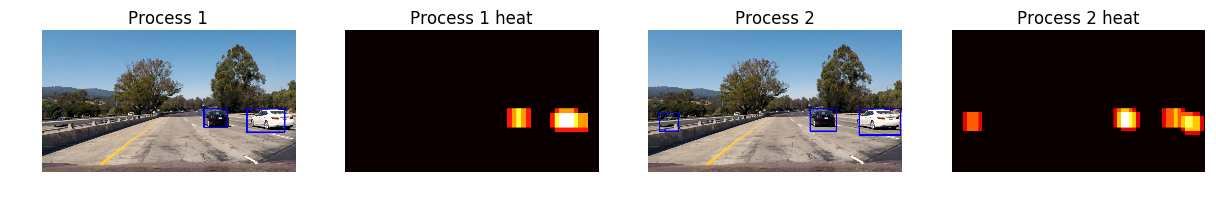

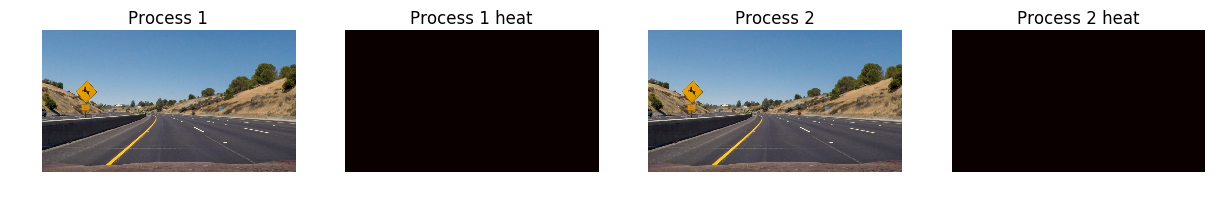

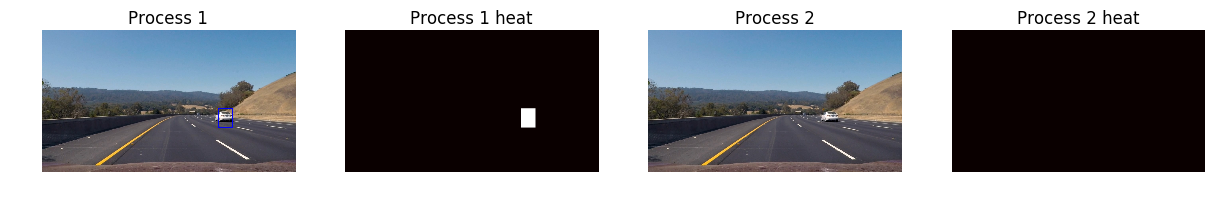

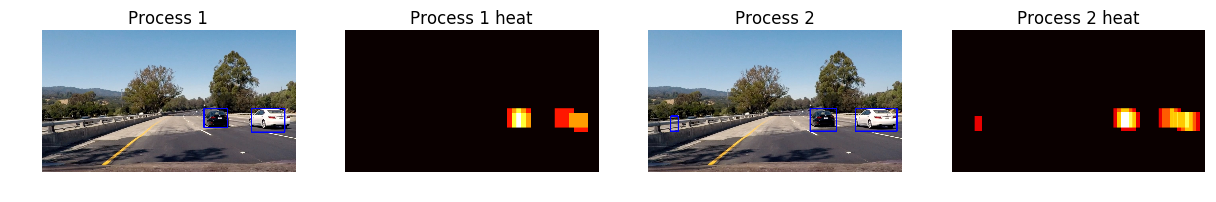

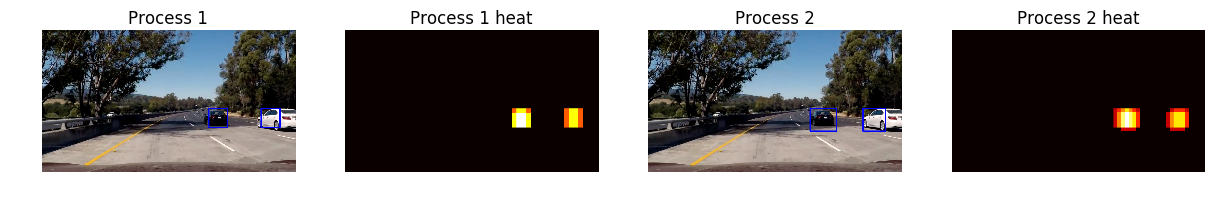

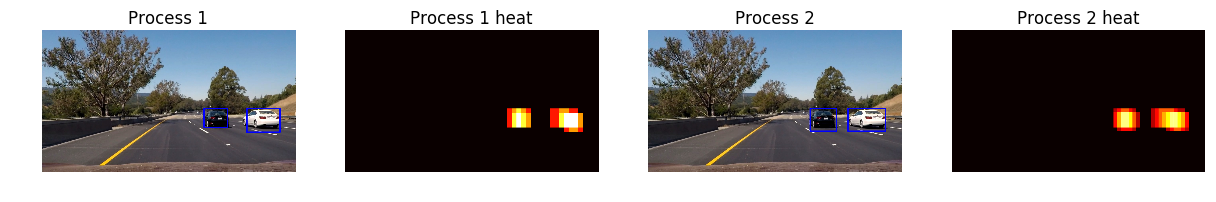

In [9]:
images = glob.glob('./test_images/*.jpg')

for img_file in images:
    image = mpimg.imread(img_file)

    vd = VehicleDetection()
    proc_1, h_1 = vd.process_image(image.copy())
    proc_2, h_2 = vd.process_image_2(image.copy())

    fig = plt.figure(figsize=(15,8))
    plt.subplot(1,4,1)
    plt.imshow(proc_1)
    plt.title('Process 1')
    plt.axis('off')
    plt.subplot(1,4,2)
    plt.imshow(h_1, cmap='hot')
    plt.title('Process 1 heat')
    plt.axis('off')
    plt.subplot(1,4,3)
    plt.imshow(proc_2)
    plt.title('Process 2')
    plt.axis('off')
    plt.subplot(1,4,4)
    plt.imshow(h_2, cmap='hot')
    plt.title('Process 2 heat')
    plt.axis('off')
    

In [10]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# vd = VehicleDetection(25,15)
# test_output = './test_video_result.mp4'
# clip = VideoFileClip('./test_video.mp4')
# test_clip = clip.fl_image(vd.process_1)

# test_clip.write_videofile(test_output, audio=False)

In [12]:
# from moviepy.editor import VideoFileClip
# from IPython.display import HTML

# vd = VehicleDetection(25,15)
# test_output = './project_video_result2.mp4'
# clip = VideoFileClip('./project_video.mp4')
# test_clip = clip.fl_image(vd.process_2)

# test_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video ./project_video_result2.mp4
[MoviePy] Writing video ./project_video_result2.mp4


100%|███████████████████████████████████▉| 1260/1261 [1:03:16<00:02,  2.98s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_result2.mp4 

